We explore one of the ready-made networks available: Zachary's Karate club. This network represents the friendships (edges) between memebers(nodes) of a karate club studied between 1970 and 1972. This club has been of long interest because it eventually split into 2 different clubs after a disagtreement between the instructor and the club president. In the original study, Zachary used the network structure to predict which members would join which of the two clubs with near-perfect accuracy

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

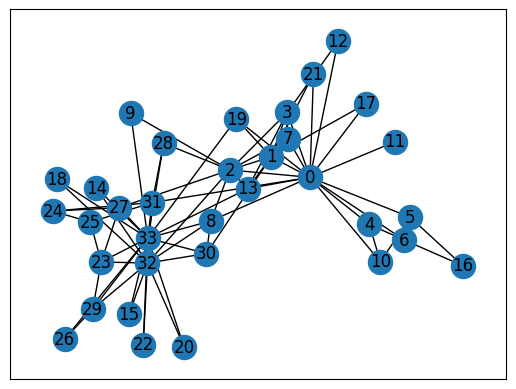

In [2]:
G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_pos)

The visualization is then pre-calculated using spring_layout() and stored in karate_pos. The spring_layout method tries to place nodes closer together if they are connected by an edge

In Zachary's paper, the node with the 0 ID was identified as the club instructor

In [4]:
mr_hi = 0
mr_hi in G

True

In [5]:
G.has_node(mr_hi)

True

In [6]:
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

## Adding attributes to nodes and edges

The graph class allows you to add any number of atrributes to a node. For a G, network, each node;s attributes are stored in the dict at G.nodes[v], where v is the node's ID. In the karate club example, the club members eventually split into 2 separate clubs. We can add an attribute to each node to describe which splinter club the corresponding member joined after the original club was disbanded. The club joined by member i is given by the ith element of the following list:

In [7]:
member_club = [
0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1]

# This information can be added by iterating over all the node IDs and setting the node attribute based on the value in member_Club
for node_id in G.nodes:
    G.nodes[node_id]["club"] = member_club[node_id]

G.nodes[mr_hi]

{'club': 0}

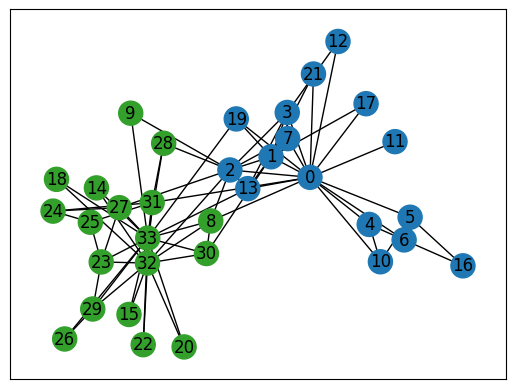

In [8]:
node_colors = [
    '#1f78b4' if G.nodes[v]["club"] == 0
    else '#33a02c' for v in G
]

nx.draw_networkx(G, karate_pos, label=True, node_color = node_colors)

In [10]:
# let us create an attribute called internal to represent whether an edge is internal to a single splinter club.

for v, w in G.edges:
    # compare 'club' property of the edge endpoints
    # set edge 'internal' property to true if they match
    if G.nodes[v]['club'] == G.nodes[w]["club"]:
        G.edges[v,w]['internal'] = True
    else:
        G.edges[v,w]['internal'] = False

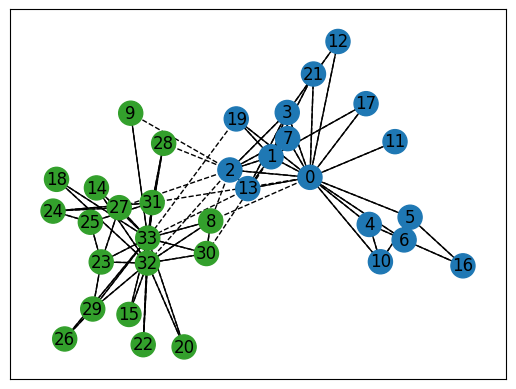

In [12]:
internal = [e  for e in G.edges if G.edges[e]["internal"]]
external = [e  for e in G.edges if ~G.edges[e]["internal"]]


# Draw nodes and node labels
nx.draw_networkx_nodes(G, karate_pos, node_color=node_colors)
nx.draw_networkx_labels(G, karate_pos)

# draw the internal and external edges separately, using the style parameter top draw the external edges as dashed lines
nx.draw_networkx_edges(G, karate_pos, edgelist=internal)
nx.draw_networkx_edges(G, karate_pos, edgelist=external, style="dashed")

## Adding edge weights
Edge weights are handy when connections can have different strengths and when there is a way to quantify the strength of a connection; for example, how often two friends talk to each other, the volume of a fluid a pipe can transport, or the number of direct flights between 2 cities.

The karate cub network doesn't have any additional information about the strength of the edges, but there are relevant properties of those edges that can be calculated, such as the tie strength. Tie strength increases with the number of neighbors that 2 nodes have in common. It is motivated by the observation that closer friends tend to have more friends in common, and it can often reveal insight into the structure of a social network.

In [19]:
def tie_strength(G, v, w):
    # get neighbors of nodes v and w in G
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    # return size of the set intersection
    return 1 + len(v_neighbors & w_neighbors)

# calculate the weight for each edge
for v,w in G.edges:
    G.edges[v,w]["weight"] = tie_strength(G, v,w)
    # store the weights in a list
    edge_weights = [G.edges[v,w]["weight"] for v,w in G.edges]


The edge weights can be passed to the spring_layout in order to push strongly connecyted nodes even closer together

In [20]:
weighted_pos = nx.spring_layout(G, pos=karate_pos, k=0.3, weight="weight")


By specifying the pos parameter of spring_layout, karate_pos is used as the starting point of the new layout. Putting all of this together, we visualize the weighted network

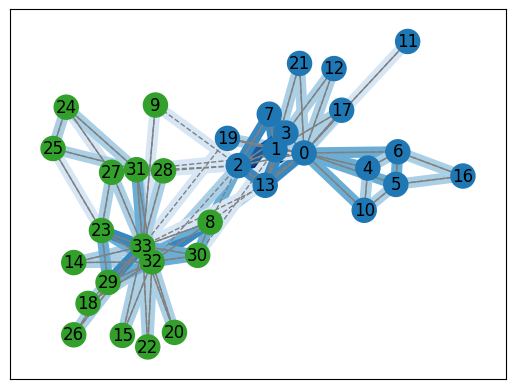

In [24]:
# Draw network with edge color determined by the weight
nx.draw_networkx(
    G,
    weighted_pos,
    width=8,
    node_color=node_colors,
    edge_color= edge_weights,
    edge_cmap=plt.cm.Blues,
    edge_vmin=0,
    edge_vmax=6
)

# Draw solid/dashed lines on top of internal/external edges

nx.draw_networkx_edges(
    G,
    weighted_pos,
    edgelist=internal,
    edge_color="gray"
)

nx.draw_networkx_edges(
    G,
    weighted_pos,
    edgelist=external,
    edge_color="gray",
    style="dashed"
)

The friendships that were split between the 2 new clubs were typically weaker than others. Mr Hi(node 0) and John A. (node 33) can be seen in the center of their respective clubs, suggesting that they played an important role in the break-up of the original club and the formation of new ones. 

# The DiGraph Class - when direction matters

So far, all of the edges have been undirected, with no difference betwee an edge from A to B, and an edge from B to A. Not all relationships are symmetric.

Here we use another social network as an example: the friendships among adolescent students in a Dutch classroom. Knecht's friendship netwrok differs from Zachary's karate club because students were asked to list their friends, but there was no requirement that their friends listed them in return. Therefore, this network is directed. 

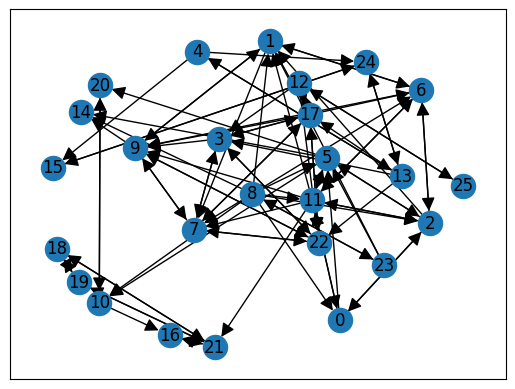

In [27]:
G = nx.read_gexf("../data/knecht2008/klas12b-net-1.gexf")
student_pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx(G, student_pos, arrowsize=20)

In a directed network, there is not just one type of neighbor, there are two. A node can be connected to others by either incoming or outgoing edges(or both). Incoming edges connect to a node to its predecessors, while outgoing edges connect to a node to its successors